# 1.  Importing Datasets from Kaggle

In [1]:
#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("advaypatil/youtube-statistics")

#print("Path to dataset files:", path)

# 2.  Importing Libraries and datasets

In [2]:
import pandas as pd
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
video_stats = pd.read_csv("C:/Users/gailt/bhaktivscode/Youtube Content Analysis/videos-stats.csv")
comments = pd.read_csv("C:/Users/gailt/bhaktivscode/Youtube Content Analysis/comments.csv")

 # 3. Exploratory Analysis of the two datasets

In [4]:
video_stats.head()

,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


In [5]:
comments.head()

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


#### We do not need the Unnamed: 0 column from both the dataframe

In [6]:
video_stats = video_stats.drop('Unnamed: 0', axis=1)
video_stats.head()

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


In [7]:
comments = comments.drop('Unnamed: 0', axis=1)
comments.head()

,Video ID,Comment,Likes,Sentiment
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


In [8]:
len(video_stats)

1881

In [9]:
len(comments)

18409

In [10]:
video_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1881 entries, 0 to 1880
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1881 non-null   object 
 1   Video ID      1881 non-null   object 
 2   Published At  1881 non-null   object 
 3   Keyword       1881 non-null   object 
 4   Likes         1879 non-null   float64
 5   Comments      1879 non-null   float64
 6   Views         1879 non-null   float64
dtypes: float64(3), object(4)
memory usage: 103.0+ KB


In [11]:
video_stats.describe()

,Likes,Comments,Views
count,1.879000e+03,1879.000000,1.879000e+03
mean,1.700610e+05,7863.331559,1.161292e+07
std,7.962293e+05,37879.964926,1.084450e+08
min,-1.000000e+00,-1.000000,2.500000e+01
25%,2.672500e+03,199.000000,8.451500e+04
50%,1.478700e+04,814.000000,5.917210e+05
75%,6.090600e+04,3377.500000,2.804978e+06
max,1.644556e+07,732818.000000,4.034122e+09


In [12]:
float_fields = video_stats.select_dtypes(include=np.float64).columns.tolist()


In [13]:
video_stats[video_stats[float_fields].isnull().any(axis=1)]

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
1879,What is Machine Learning?,f_uwKZIAeM0,2017-01-11,machine learning,NaN,NaN,NaN
1880,Don&#39;t learn machine learning,cyLWtMSry58,2020-03-30,machine learning,NaN,NaN,NaN


#### There are just 2 videos where the likes comments are disabled and there are no views also too these rows will not be useful for the anlysis so we can drop these rows from the dataset.

In [14]:
video_stats = video_stats.dropna()

In [15]:
len(video_stats)

1879

#### We should note these videos which did not had any views and check with the team whether it was data issue or there were no viewsfor this video.

In [16]:
video_stats.describe()

,Likes,Comments,Views
count,1.879000e+03,1879.000000,1.879000e+03
mean,1.700610e+05,7863.331559,1.161292e+07
std,7.962293e+05,37879.964926,1.084450e+08
min,-1.000000e+00,-1.000000,2.500000e+01
25%,2.672500e+03,199.000000,8.451500e+04
50%,1.478700e+04,814.000000,5.917210e+05
75%,6.090600e+04,3377.500000,2.804978e+06
max,1.644556e+07,732818.000000,4.034122e+09


In [17]:
video_stats['likes_int'] = video_stats.Likes.apply(lambda x: x.is_integer())

In [18]:
video_stats.likes_int

0       True
1       True
2       True
3       True
4       True
        ... 
1874    True
1875    True
1876    True
1877    True
1878    True
Name: likes_int, Length: 1879, dtype: bool

In [19]:
video_stats[video_stats.likes_int == False]  

,Title,Video ID,Published At,Keyword,Likes,Comments,Views,likes_int


In [20]:
video_stats['Comments_int'] = video_stats.Comments.apply(lambda x: x.is_integer())

In [21]:
video_stats[video_stats.Comments_int == False]

,Title,Video ID,Published At,Keyword,Likes,Comments,Views,likes_int,Comments_int


In [22]:
video_stats['Views_int'] = video_stats.Views.apply(lambda x: x.is_integer())

In [23]:
video_stats[video_stats.Views_int == False]

,Title,Video ID,Published At,Keyword,Likes,Comments,Views,likes_int,Comments_int,Views_int


#### Thre are no decimal places for Likes, Comments and views. Can convert it into integer.

In [24]:
video_stats.head()

,Title,Video ID,Published At,Keyword,Likes,Comments,Views,likes_int,Comments_int,Views_int
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,True,True,True
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0,True,True,True
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0,True,True,True
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0,True,True,True
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0,True,True,True


In [25]:
video_stats = video_stats.drop(['Views_int', 'Comments_int', 'likes_int'], axis=1)

In [26]:
video_stats.head()

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


In [27]:
video_stats['Likes'] = video_stats['Likes'].astype(int)
video_stats['Comments'] = video_stats['Comments'].astype(int)
video_stats['Views'] = video_stats['Views'].astype(int)

In [28]:
video_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1879 entries, 0 to 1878
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1879 non-null   object
 1   Video ID      1879 non-null   object
 2   Published At  1879 non-null   object
 3   Keyword       1879 non-null   object
 4   Likes         1879 non-null   int64 
 5   Comments      1879 non-null   int64 
 6   Views         1879 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 117.4+ KB


In [29]:
video_stats.head()

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779,4306,1758063
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825,3338,1564007
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566,1426,922918
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513,5155,1855644


#### Converting Published At field as date type

In [30]:
video_stats['Published At'] = pd.to_datetime(video_stats['Published At'])

In [31]:
video_stats['year'] = video_stats['Published At'].dt.year
video_stats['month'] = video_stats['Published At'].dt.month

In [32]:
video_stats.year.unique()

array([2022, 2021, 2020, 2018, 2019, 2017, 2016, 2013, 2009, 2015, 2012,
       2014, 2010, 2007, 2011, 2008], dtype=int32)

#### There is data about videos from 2007 to 2022

#### There are 1879 rows in the dataset. Checking how many unique videos are there.

In [33]:
video_stats['Video ID'].nunique()

1867

In [34]:
video_stats[video_stats.duplicated(keep=False)]

,Title,Video ID,Published At,Keyword,Likes,Comments,Views,year,month


#### There are no duplicated rows in the dataset  but still the number of videos are less than the number of total rows.

In [35]:
filtered = video_stats['Video ID'].value_counts()
vid = filtered[filtered > 1].index.tolist()

filtered_rows = video_stats[video_stats['Video ID'].isin(vid)]
print(filtered_rows)


                                                  Title     Video ID  \
2                    My New House Gaming Setup is SICK!  4mgePWWCAmA   
88                   My New House Gaming Setup is SICK!  4mgePWWCAmA   
91                          I OPENED MY OWN ARCADE SHOP  WBK2_lD7KGA   
129   ASMR Gaming 😴 Fortnite 1 Kill = 1 Trigger Rela...  mqc6QqoGNWI   
225             How to Solve a Rubik&#39;s Cube | WIRED  R-R0KrXvWbc   
319   20 Minecraft Block Facts You Maybe Didn&#39;t ...  LeC5yJq4tsI   
423             How to Solve a Rubik&#39;s Cube | WIRED  R-R0KrXvWbc   
472            The History Of Chess: A Reflection Of Us  kkOweffr3II   
682            The History Of Chess: A Reflection Of Us  kkOweffr3II   
848   ASMR Gaming 😴 Fortnite 1 Kill = 1 Trigger Rela...  mqc6QqoGNWI   
891   Lofi For Reading 📚 Lofi Hip Hop | Study Music ...  ZgeorpjGJC0   
916       BLACKPINK - ‘Pink Venom’ DANCE PRACTICE VIDEO  RFMi3v0TXP8   
1041      BLACKPINK - ‘Pink Venom’ DANCE PRACTICE VIDEO  RFMi3v0

#### There can be more than one keywords for a video and if that is the case then we get multiple rows for it.

#### Looking at the Comments dataset

In [36]:
comments[comments['Video ID']=='4mgePWWCAmA']

,Video ID,Comment,Likes,Sentiment
20,4mgePWWCAmA,Linus!!! Just turn the key lights 180 and bou...,456.0,2.0
21,4mgePWWCAmA,"Dan continues to be my new favorite, he has su...",962.0,2.0
22,4mgePWWCAmA,Dan managing to set up his soldering station o...,518.0,2.0
23,4mgePWWCAmA,Linus: *Gets on his employee's cases for all t...,194.0,2.0
24,4mgePWWCAmA,"Linus: ""This is not a table.""\nAlso Linus: Let...",304.0,1.0
25,4mgePWWCAmA,Dan the man. Saving the day. Riley needs to gi...,3371.0,2.0
26,4mgePWWCAmA,Dan continues to be a favourite for me. He's l...,36.0,2.0
27,4mgePWWCAmA,Dan is a treasure. Your channel has long lacke...,134.0,2.0
28,4mgePWWCAmA,"Blows my mind how quickly Dan became the ""rock...",274.0,2.0
29,4mgePWWCAmA,"Hey Linus, a good trick for streaming lights: ...",13.0,2.0


#### Looks like there are repeated values

In [37]:
num_duplicated  = comments.duplicated().sum()
print(num_duplicated)

148


In [38]:
len(comments)

18409

#### There are 148 duplicated rows in the dataset. We do not need these duplicated rows we can delete them.

In [39]:
comments = comments.drop_duplicates()
len(comments)

18261

#### Converting Likes field on the comment to an integer

In [40]:
comments.Likes = comments.Likes.astype(int)

In [41]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18261 entries, 0 to 18408
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Video ID   18261 non-null  object 
 1   Comment    18260 non-null  object 
 2   Likes      18261 non-null  int64  
 3   Sentiment  18261 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 713.3+ KB


In [42]:
comments.describe()

,Likes,Sentiment
count,18261.000000,18261.000000
mean,1044.469416,1.492087
std,10692.762499,0.710896
min,0.000000,0.000000
25%,5.000000,1.000000
50%,29.000000,2.000000
75%,191.000000,2.000000
max,891372.000000,2.000000


#### Finding if there are any videos where the comments are missing in the comments dataset.

In [43]:
missing_in_comments = video_stats[~video_stats['Video ID'].isin(comments['Video ID'])]
print(missing_in_comments)

Empty DataFrame
Columns: [Title, Video ID, Published At, Keyword, Likes, Comments, Views, year, month]
Index: []


In [44]:
video_stats.Keyword.nunique()

41

In [45]:
video_stats.Keyword.unique()

array(['tech', 'news', 'gaming', 'sports', 'how-to', 'business',
       'tutorial', 'finance', 'crypto', 'cubes', 'chess', 'apple',
       'google', 'interview', 'history', 'literature', 'bed', 'trolling',
       'asmr', 'music', 'food', 'mukbang', 'reaction', 'lofi', 'animals',
       'education', 'minecraft', 'sat', 'mrbeast', 'cnn', 'mathchemistry',
       'biology', 'physics', 'computer science', 'nintendo', 'xbox',
       'marvel', 'movies', 'data science', 'game development',
       'machine learning'], dtype=object)

In [46]:
video_stats['Likes'] = video_stats['Likes'].replace(-1,0)

#### All the videos have top 10 comments in the comments dataset.

In [47]:
comments.head()

,Video ID,Comment,Likes,Sentiment
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95,1.0
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19,0.0
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161,2.0
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8,0.0
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34,2.0


#### Sentiment Analysis of the Comment. Cannot rely on the Senitment field because do not know how it was populated.

In [48]:
sia = SentimentIntensityAnalyzer()

In [49]:
comments.Comment.isnull().sum()

np.int64(1)

In [50]:
comments.Comment = comments.Comment.astype(str)

In [51]:
comments['sentiment_score'] = comments.Comment.apply(lambda x: sia.polarity_scores(x)['compound'])

In [52]:
comments.head()

,Video ID,Comment,Likes,Sentiment,sentiment_score
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95,1.0,0.6774
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19,0.0,0.8360
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161,2.0,0.8718
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8,0.0,-0.8981
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34,2.0,0.6786


In [53]:
def get_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [54]:
comments['Sentiment_Label'] = comments['sentiment_score'].apply(get_label)

In [55]:
comments.head()

,Video ID,Comment,Likes,Sentiment,sentiment_score,Sentiment_Label
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95,1.0,0.6774,Positive
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19,0.0,0.8360,Positive
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161,2.0,0.8718,Positive
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8,0.0,-0.8981,Negative
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34,2.0,0.6786,Positive


In [56]:
comments.Sentiment_Label.value_counts()

Sentiment_Label
Positive    12530
Neutral      3236
Negative     2495
Name: count, dtype: int64

#### Deleting the Sentimnt field from the datset as do not need it anymore as we created a new field for it.

In [57]:
comments.drop('Sentiment', axis=1)

,Video ID,Comment,Likes,sentiment_score,Sentiment_Label
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95,0.6774,Positive
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19,0.8360,Positive
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161,0.8718,Positive
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8,-0.8981,Negative
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34,0.6786,Positive
...,...,...,...,...,...
18404,cyLWtMSry58,I really like the point about engineering tool...,0,0.8651,Positive
18405,cyLWtMSry58,I’ve just started exploring this field. And th...,20,0.7495,Positive
18406,cyLWtMSry58,Excelente video con una pregunta filosófica pr...,1,0.0000,Neutral
18407,cyLWtMSry58,"Hey Daniel, just discovered your channel a cou...",35,0.4199,Positive


#### Analying some questions on the datasets.

#### Ques 1: Top 5 keywords by average video views for the whole time period.

In [58]:
video_stats.head()

,Title,Video ID,Published At,Keyword,Likes,Comments,Views,year,month
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,2022,8
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779,4306,1758063,2022,8
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825,3338,1564007,2022,8
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566,1426,922918,2022,8
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513,5155,1855644,2022,8


In [59]:
avg_views = video_stats.groupby('Keyword')['Views'].mean().reset_index()

In [60]:
avg_views['Views'] = avg_views['Views'].astype(int)

In [61]:
avg_views.head()

,Keyword,Views
0,animals,94723960
1,apple,10746930
2,asmr,1706615
3,bed,53893228
4,biology,4121605


In [62]:
top_keywords = avg_views.sort_values(by='Views', ascending = False).head(5)
print(top_keywords)

    Keyword      Views
17   google  103364970
0   animals   94723960
28  mrbeast   66764003
3       bed   53893228
30    music   29364893


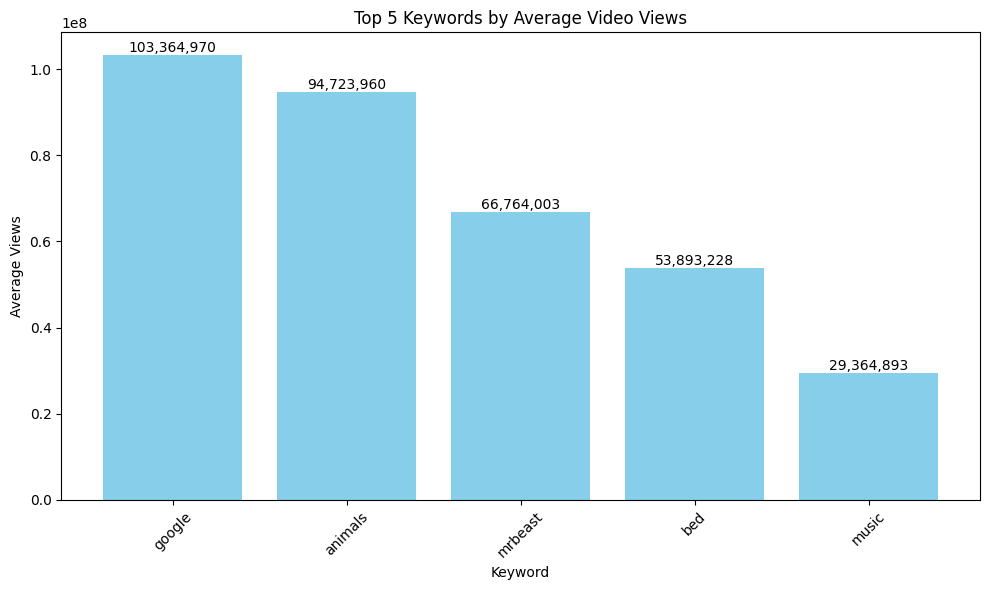

In [63]:
plt.figure(figsize=(10,6))
bars =  plt.bar(top_keywords['Keyword'], top_keywords['Views'], color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,}", 
             ha='center', va='bottom', fontsize=10)

# Labels and title
plt.xlabel('Keyword')
plt.ylabel('Average Views')
plt.title('Top 5 Keywords by Average Video Views')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 

This bar chart visualizes the average video views for the top 5 keywords, providing insights into which content theme resonates with the viewers.
Key observations:
1. Dominance of google and animal: This suggests that the content related to these broad categories consistently attracts a very large audience.
2. Strong performance of MR Beast: This indicates a dignificant impact of individual creator.
3. Moderate Performance of bed: It represents substantial vieweship, hinting at its popularity. The main viewership is because of the video of songs BED but there are some videos for actual Bed. 
4. Lower Performance of Music: Music is at the bottom of the top 5 average views. Its position relative to the other keywords suggests that music content is popular and more engaging.

Potential Implications and Recommentations:
1. Some investigation needs to happen to understand how the categorization of viedos happen for various keywords.
2. Investing in Google and Animal content keywords appear to be high yield for maximizing average views.
3. The success of MR Beast emphasizes the importance of understanding and potentially collaborating with the creators or developing strong brand to attract viewers.
4. Further investigation would be needed to categorization of this keyword to understand it is miscategorization of the keyword bed instead of music.
5. For music content, it might be beneficial to analyze what specific types of music, artists, or video formats perform best to optimize engagement and average views. Strategies could include focusing on trending artists, specific genres, or unique video concepts

Further Analysis:
1. Trend Analysis: To see the keywords are consistently popular or their performance varies over time.
2. Audience Demographics: Understand which keywords are popular for the demographics and tailor the content for the audience.
3. Enagagement Metrics: Understand audience interaction beyond just views.   

In [64]:
video_stats[video_stats.Keyword == 'bed']

,Title,Video ID,Published At,Keyword,Likes,Comments,Views,year,month
744,Jacquees - B.E.D.,ul1H_p_FeaA,2017-04-17,bed,1121873,23969,145167323,2017,4
745,Jacquees - B.E.D. (Audio),O3H57UrX4MM,2017-02-15,bed,79639,921,10792977,2017,2
746,J. Holiday - Bed (Official Music Video),82t_UOMHPJY,2007-07-16,bed,515049,16568,78137822,2007,7
747,Nicki Minaj - Bed ft. Ariana Grande,zxtl5ExJmag,2018-07-07,bed,1499298,75048,94340456,2018,7
748,Joel Corry x RAYE x David Guetta - BED [Offici...,mD2a9YzKV3w,2021-03-05,bed,157924,2760,29657435,2021,3
749,Joel Corry x RAYE x David Guetta - BED [Offici...,8mOPFGfJ5WQ,2021-02-26,bed,121553,1171,26260197,2021,2
750,"Jacquees - B.E.D. (Remix) ft. Ty Dolla $ign, Q...",Oyo3tNlamDw,2017-08-16,bed,340686,8853,35695760,2017,8
751,jacquees - B.E.D. (Lyrics) | Nightly Music,IlRN5v5k5SY,2021-03-31,bed,6626,64,401678,2021,3
752,Powfu - death bed (coffee for your head) (Offi...,jJPMnTXl63E,2020-04-01,bed,7786057,195769,524709805,2020,4
753,J Holiday - Bed,uAwPjFq1W4s,2007-12-11,bed,119272,3743,26826274,2007,12


In [65]:
video_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1879 entries, 0 to 1878
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Title         1879 non-null   object        
 1   Video ID      1879 non-null   object        
 2   Published At  1879 non-null   datetime64[ns]
 3   Keyword       1879 non-null   object        
 4   Likes         1879 non-null   int64         
 5   Comments      1879 non-null   int64         
 6   Views         1879 non-null   int64         
 7   year          1879 non-null   int32         
 8   month         1879 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(3), object(3)
memory usage: 132.1+ KB


#### Ques 2: Videos with high like to view ratio and their keywords for the whole time interval

In [66]:
video_stats_unique = video_stats[['Title', 'Video ID', 'Likes', 'Comments', 'Views']]

In [67]:
len(video_stats_unique)

1879

In [68]:
video_stats_unique = video_stats_unique.drop_duplicates()

In [69]:
video_stats_unique.loc[: , 'like_view_ratio'] = video_stats_unique['Likes']/ video_stats_unique['Views']

In [70]:
video_stats_unique.head()

,Title,Video ID,Likes,Comments,Views,like_view_ratio
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,3407,672,135612,0.025123
1,The most EXPENSIVE thing I own.,b3x28s61q3c,76779,4306,1758063,0.043672
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,63825,3338,1564007,0.040809
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,71566,1426,922918,0.077543
4,Best Back to School Tech 2022!,ErMwWXQxHp0,96513,5155,1855644,0.052011


In [71]:
video_stats_unique['like_view_ratio'] = video_stats_unique['like_view_ratio'].astype(float)

In [72]:
video_stats_unique.sort_values(by='like_view_ratio', ascending=False).head(5)

,Title,Video ID,Likes,Comments,Views,like_view_ratio
1174,"Education should be a right for all, not a pri...",I0dKGM_B3ys,1445,296,6611,0.218575
99,🔥Artistic Music Mix 2022: Top 50 Songs ♫ Best ...,GiHBWPRybpw,1243,21,5967,0.208312
116,اصعب لعبة جوال تخليك تعصب ضحك وتحشيش,RnpJZLc7WtQ,46642,1287,268946,0.173425
470,Elefante38 IMPRESSIONA SUPER GM!,2pt9bQzRCYs,8738,412,53211,0.164214
115,Gaming Memes Only True Gamers Understand 84 #M...,i_n68sBUTow,39872,187,246407,0.161814


In [73]:
video_stats_top_like_view_ratio = video_stats_unique.sort_values(by='like_view_ratio', ascending=False).head(5)

In [74]:
video_stats_top_like_view_ratio

,Title,Video ID,Likes,Comments,Views,like_view_ratio
1174,"Education should be a right for all, not a pri...",I0dKGM_B3ys,1445,296,6611,0.218575
99,🔥Artistic Music Mix 2022: Top 50 Songs ♫ Best ...,GiHBWPRybpw,1243,21,5967,0.208312
116,اصعب لعبة جوال تخليك تعصب ضحك وتحشيش,RnpJZLc7WtQ,46642,1287,268946,0.173425
470,Elefante38 IMPRESSIONA SUPER GM!,2pt9bQzRCYs,8738,412,53211,0.164214
115,Gaming Memes Only True Gamers Understand 84 #M...,i_n68sBUTow,39872,187,246407,0.161814


In [75]:
video_stats.head()

,Title,Video ID,Published At,Keyword,Likes,Comments,Views,year,month
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,2022,8
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779,4306,1758063,2022,8
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825,3338,1564007,2022,8
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566,1426,922918,2022,8
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513,5155,1855644,2022,8


In [76]:
top_like_video_ratio = pd.merge(video_stats_top_like_view_ratio, video_stats[['Video ID', 'Keyword']], on ='Video ID', how='inner')

In [77]:
top_like_video_ratio

,Title,Video ID,Likes,Comments,Views,like_view_ratio,Keyword
0,"Education should be a right for all, not a pri...",I0dKGM_B3ys,1445,296,6611,0.218575,education
1,🔥Artistic Music Mix 2022: Top 50 Songs ♫ Best ...,GiHBWPRybpw,1243,21,5967,0.208312,gaming
2,اصعب لعبة جوال تخليك تعصب ضحك وتحشيش,RnpJZLc7WtQ,46642,1287,268946,0.173425,gaming
3,Elefante38 IMPRESSIONA SUPER GM!,2pt9bQzRCYs,8738,412,53211,0.164214,chess
4,Gaming Memes Only True Gamers Understand 84 #M...,i_n68sBUTow,39872,187,246407,0.161814,gaming


In [78]:
top_like_video_ratio[['Title', 'Keyword','Likes', 'Views', 'like_view_ratio']]

,Title,Keyword,Likes,Views,like_view_ratio
0,"Education should be a right for all, not a pri...",education,1445,6611,0.218575
1,🔥Artistic Music Mix 2022: Top 50 Songs ♫ Best ...,gaming,1243,5967,0.208312
2,اصعب لعبة جوال تخليك تعصب ضحك وتحشيش,gaming,46642,268946,0.173425
3,Elefante38 IMPRESSIONA SUPER GM!,chess,8738,53211,0.164214
4,Gaming Memes Only True Gamers Understand 84 #M...,gaming,39872,246407,0.161814


This metric is crucial as it not only highlights the numbers of viewers it attracts but gives the information how many are engaging with the video.

Key Observations:
1. The first video on education has a high like to view ratio given the relatively low view count, this shows that education videos connect with the audience better.
2. Gaming dominates the top engaged content, taking 3 spots out of 5. This indicates that the gaming community is highly engaged and passionate.
3. It is important to note that a high like to view ratio do not necessarily have high absolute view counts 21.9% is a high engagement ratio. This emphasizes that high like to view ratio is a mesure of content qualitty and viewer satisfaction.
4. The presence of Arabic content in the top 5 suggests strong engagenment within speicifc language community.

Potential Implications and Recommendations:
1. For content creators, focusing on the like to view ratio can be powerful strategy for identyfying impactful videos. 
2. The high engagement for education, gaming and chess indicates that creating content for specific, passionate comuunites can yield high satisfaction rates.

Analysis:
1. To see if high like to view ratios correlate with the longer watch times.
2. Do the highly engaged videos converts viewers to subscribers
3. Analyze the all the comment of these videos and understand why the people like these videos.

#### Ques 3: Keywords that generates most comments for the whole time frame.

In [79]:
video_stats.head()

,Title,Video ID,Published At,Keyword,Likes,Comments,Views,year,month
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,2022,8
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779,4306,1758063,2022,8
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825,3338,1564007,2022,8
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566,1426,922918,2022,8
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513,5155,1855644,2022,8


In [80]:
keyword_by_comments = video_stats.groupby('Keyword')['Comments'].sum().reset_index()

In [81]:
keyword_by_comments = keyword_by_comments.sort_values(by='Comments', ascending=False)

In [82]:
key_comment_top = keyword_by_comments.head(5).copy()

In [83]:
key_comment_bottom = keyword_by_comments.tail(5).copy()

In [84]:
key_comment_top.loc[:,'Type'] = 'Top'
key_comment_bottom.loc[:,'Type'] = 'Bottom'

In [85]:
combined_key_comment = pd.concat([key_comment_top, key_comment_bottom], axis=0)

In [86]:
combined_key_comment= combined_key_comment.reset_index()

In [87]:
combined_key_comment = combined_key_comment.drop('index', axis=1)

In [88]:
combined_key_comment

,Keyword,Comments,Type
0,mrbeast,4797224,Top
1,google,1019079,Top
2,history,1009501,Top
3,animals,831129,Top
4,bed,667962,Top
5,news,46154,Bottom
6,finance,42277,Bottom
7,literature,40473,Bottom
8,crypto,27331,Bottom
9,data science,25876,Bottom


In [89]:
combined_key_comment = combined_key_comment.sort_values(by='Comments', ascending = True)


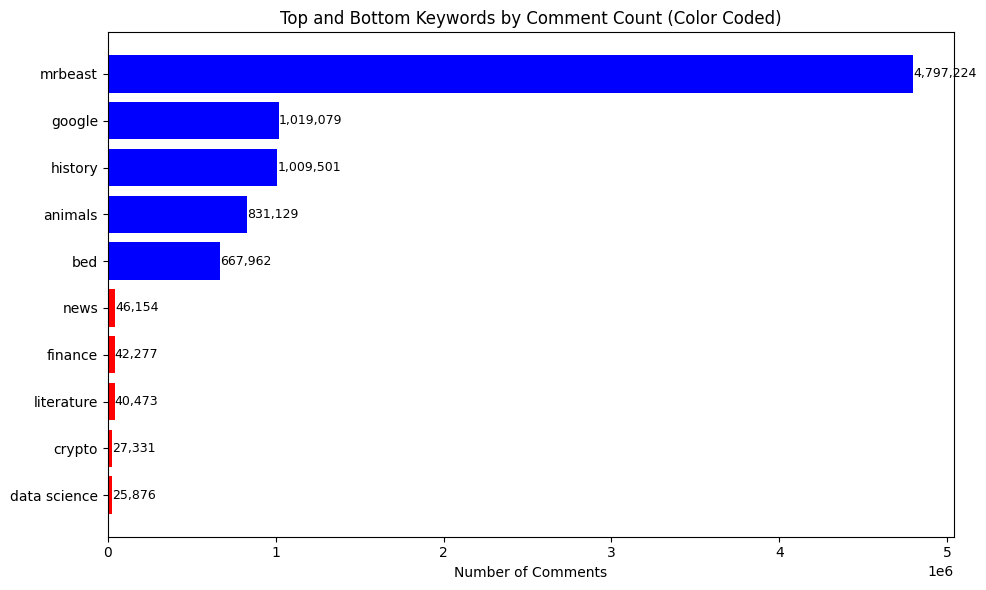

In [90]:
plt.figure(figsize=(10,6))
colors = combined_key_comment['Type'].map({'Top': 'blue',
                                           'Bottom': 'red'})
N =5
bars =plt.barh(combined_key_comment['Keyword'], combined_key_comment['Comments'], color=colors)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
             f'{int(width):,}', va='center', fontsize=9)

# Labels and title
plt.xlabel('Number of Comments')
plt.title('Top and Bottom Keywords by Comment Count (Color Coded)')
plt.tight_layout()
plt.show()

This visualization of the keywords that generates the highest and the least comments serves as an indicator of interaction by the viewers.

Key Observations:
1. Mr Beast dominates the Comment engagement. This indicates an extremely active and engaged community around the creator. The content maybe creates lot of discussions, and fan interactions.
2. Google and History drive significant discussion. This suggests that content related to historical topics and tech with google encourage viewers to share their thoughts, ask question and engage discussions.
3. Animals and Bed show moderate engagement. This indicates that the comments are way less than the other ones but they still represent substantial interactions.
4. There is a significant difference in the number of interactions with the top and the bottom performing keywords. This indicates a difference in how audience interacts with the various contents.
5. News, Finance, Crypto, Literature and data science has the least number of interactions. The audience might consume the content for information rather than interactions.

Potential Implicationa dn Recommendations:
1. For creators aiming for strtonger communities, content related to high-engagement keywords should be prioritized. 
2. If the goal is discussion and interaction, focusing on videos that start opinions, debates would be beneficial.
3. For categories with low comment counts need to understand is to due to content nature, do the audience prefers passive consumption.

Further Analysis
1. Bring video count for each keywords to see if there are very few number of the video in the bottom keywords.
2. Performance the time series analysis for comment counts for these keywords over time.  

#### Ques 4: Engagament Score and find top 10 videos

In [91]:
video_stats['Engagement_Score'] = (video_stats['Likes'] + video_stats['Comments'])/video_stats['Views']

In [92]:
video_stats.sort_values(by='Engagement_Score', ascending=False).head(10)

,Title,Video ID,Published At,Keyword,Likes,Comments,Views,year,month,Engagement_Score
1174,"Education should be a right for all, not a pri...",I0dKGM_B3ys,2022-08-24,education,1445,296,6611,2022,8,0.263349
99,🔥Artistic Music Mix 2022: Top 50 Songs ♫ Best ...,GiHBWPRybpw,2022-08-24,gaming,1243,21,5967,2022,8,0.211832
116,اصعب لعبة جوال تخليك تعصب ضحك وتحشيش,RnpJZLc7WtQ,2022-08-22,gaming,46642,1287,268946,2022,8,0.178210
409,🔴 URGENT Bitcoin Shocking Trend for Big Profit...,L1myCVUeR4Q,2022-08-23,crypto,705,627,7516,2022,8,0.177222
1062,NO MORE A FAMILY FRIENDLY VLOGGER | LAKSHAY CH...,-EDUPj7Vg7o,2022-08-23,reaction,196898,15525,1223879,2022,8,0.173565
470,Elefante38 IMPRESSIONA SUPER GM!,2pt9bQzRCYs,2022-08-24,chess,8738,412,53211,2022,8,0.171957
696,HOW THE WORLD TURNED ON THIS DAY #royalfamily ...,O4ju5QDfqCM,2022-08-23,history,1027,111,6640,2022,8,0.171386
1619,Xbox Gamepass Continue to Deliver Great Conten...,xFcT0zIQcds,2022-08-24,xbox,449,282,4368,2022,8,0.167353
110,Mylta Power Station Long drive &amp; Night Foo...,9BFPMqT4twI,2022-08-23,gaming,10556,466,66633,2022,8,0.165414
379,THIS WILL SHOCK EVERYONE!!!!!,lDcqVQnptw8,2022-08-24,crypto,827,568,8502,2022,8,0.164079


All the videos published in year 2022 has the most engagement scores. 

Key Observations and Insights:
1. The video "Education should be a right.." has the highest engagement score of 26.3%. the video has a relatively low views but high likes and comments indicates that the viewers are engaged audience for this topic.
2. There are 3 videos for gaming  which has a high engagement score. This highlights the consistently high engagement within the gaming community, whether it's for music mixes, gameplay commentary, or specific game-related content.
3. Two crypto videos makes to the top 10. Crypto was among the lowest keywords by raw comment fromt the previous analysis.  with the engagement score it shows that viewers who do watch crypto content are highly inclined to engage. This suggests that crypto content, while perhaps niche, cultivates a very active and interactive audience.
4. Chess and History show strong engagement. Viewers of these topics are actively reposnding to the content.
5. The video No More A Family has a high engagemtn score but the Video ID starts with -. This might indicates a missing or uncategorized keyword or perhaps a speific tag. Further analysis of videos with Vieo ID starting with -

Potential Implications and Recommendations:
1. For creators aiming to build an active community, focusing on topics like education, gaming, crypto could yield higher audience interactions.
2. High engagement often correlates with brand loyalty and deeper connection, which can be valuable for sponsorships, merchandise, or community-driven monetization models, even for videos with fewer absolute views.
3. The presence of - in Video ID suggests that there is some analysis required here.

#### Ques 5: Avg Sentiment Scores for comments on videos published in 2022-08 

In [93]:
comments.head()

,Video ID,Comment,Likes,Sentiment,sentiment_score,Sentiment_Label
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95,1.0,0.6774,Positive
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19,0.0,0.8360,Positive
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161,2.0,0.8718,Positive
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8,0.0,-0.8981,Negative
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34,2.0,0.6786,Positive


In [94]:
video_stats_filtered = video_stats[(video_stats['year']==2022) &(video_stats['month']==8)]

In [95]:
comments_filtered20228 = comments[comments['Video ID'].isin(video_stats_filtered['Video ID'])] 

In [96]:
comments_filtered20228.head()

,Video ID,Comment,Likes,Sentiment,sentiment_score,Sentiment_Label
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95,1.0,0.6774,Positive
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19,0.0,0.8360,Positive
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161,2.0,0.8718,Positive
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8,0.0,-0.8981,Negative
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34,2.0,0.6786,Positive


In [97]:
len(comments_filtered20228)

7383

In [98]:
video_sentiment = comments_filtered20228.groupby('Video ID')['sentiment_score'].mean().reset_index()

In [99]:
video_sentiment.columns = ['Video ID', 'Avg sentiment Score']

In [100]:
video_sentiment.head()

,Video ID,Avg sentiment Score
0,--hxd1CrOqg,-0.53715
1,--ixiTypG8g,-0.08203
2,-8TnsjDRXUE,0.56902
3,-Cr69sGnrk8,0.33284
4,-D4S6TpnO44,0.69325


In [101]:
video_sentiment['Sentiment_Label for Avg'] = video_sentiment['Avg sentiment Score'].apply(get_label)

In [102]:
video_sentiment.head()

,Video ID,Avg sentiment Score,Sentiment_Label for Avg
0,--hxd1CrOqg,-0.53715,Negative
1,--ixiTypG8g,-0.08203,Negative
2,-8TnsjDRXUE,0.56902,Positive
3,-Cr69sGnrk8,0.33284,Positive
4,-D4S6TpnO44,0.69325,Positive


In [103]:
video_sentiment_top = video_sentiment.sort_values(['Avg sentiment Score'], ascending = False).head(5).copy()

In [104]:
video_sentiment_top

,Video ID,Avg sentiment Score,Sentiment_Label for Avg
364,TD81VzkLUVE,0.907780,Positive
371,U-WawEOgGLA,0.851667,Positive
308,PyynWtxu3ac,0.847920,Positive
514,eqOWtZHQV3I,0.839930,Positive
436,ZIJpiMXOaUg,0.838100,Positive


In [105]:
video_sentiment_bottom = video_sentiment.sort_values(['Avg sentiment Score'], ascending = False).tail(5).copy()

In [106]:
video_sentiment_bottom

,Video ID,Avg sentiment Score,Sentiment_Label for Avg
0,--hxd1CrOqg,-0.537150,Negative
543,gVqeaFLr9Ec,-0.653300,Negative
475,be1frkduYbY,-0.672280,Negative
387,V6hofBnlJLY,-0.726867,Negative
136,ARnERQncs0I,-0.912200,Negative


In [107]:
video_sentiment_merged = pd.concat([video_sentiment_top, video_sentiment_bottom], axis=0)

In [108]:
video_sentiment_merged

,Video ID,Avg sentiment Score,Sentiment_Label for Avg
364,TD81VzkLUVE,0.907780,Positive
371,U-WawEOgGLA,0.851667,Positive
308,PyynWtxu3ac,0.847920,Positive
514,eqOWtZHQV3I,0.839930,Positive
436,ZIJpiMXOaUg,0.838100,Positive
0,--hxd1CrOqg,-0.537150,Negative
543,gVqeaFLr9Ec,-0.653300,Negative
475,be1frkduYbY,-0.672280,Negative
387,V6hofBnlJLY,-0.726867,Negative
136,ARnERQncs0I,-0.912200,Negative


In [109]:
video_sentimen_details = pd.merge(video_sentiment_merged, 
         video_stats_filtered[['Video ID', 'Title', 'Keyword', 'Likes', 'Comments', 'Views'] ],
         on = 'Video ID',
         how = 'inner')

In [110]:
video_sentimen_details

,Video ID,Avg sentiment Score,Sentiment_Label for Avg,Title,Keyword,Likes,Comments,Views
0,TD81VzkLUVE,0.907780,Positive,DESCRIBE YOURSELF! (The S.M.A.R.T way to DESCR...,interview,1011,116,34941
1,U-WawEOgGLA,0.851667,Positive,Attention: Bitcoin is About to Destroy New Cry...,crypto,1720,272,20600
2,PyynWtxu3ac,0.847920,Positive,ASMR On My Lap: Face Tracing to Fall Asleep SO...,asmr,6160,311,146821
3,eqOWtZHQV3I,0.839930,Positive,iPhone 14 Apple Event Announced! Here&#39;s Wh...,apple,3586,295,108055
4,ZIJpiMXOaUg,0.838100,Positive,"BACK TO SCHOOL HAIR TUTORIAL! | Elementary, Mi...",tutorial,10595,826,345071
5,--hxd1CrOqg,-0.537150,Negative,Deadly car bomb detonates outside Moscow,news,6379,4853,808787
6,gVqeaFLr9Ec,-0.653300,Negative,Endgame closure | CM Crevatin Leo - IM Yuri La...,chess,52,11,2471
7,be1frkduYbY,-0.672280,Negative,Was bringt das Apple-September-2022-Event - 4K...,apple,184,47,1954
8,V6hofBnlJLY,-0.726867,Negative,Friday Finance | Season 03 | Trailer | Web Ser...,finance,16,3,83121
9,ARnERQncs0I,-0.912200,Negative,The NFL Experience with Kai Nacua and Tyler Al...,sports,15,1,867


This table presents the average sentiment scores for the top 10 comments on a selection of videos published in August 2022. The sentiment score, ranging from -1 (most negative) to 1 (most positive), indicates the overall emotional tone of the comments. 
Sentiment Analysis adds a qualitative layer to engagement metrics. Avideo might have high views and comments but if those comments are negative then it a different story than highly positive engagement.

Key Observations and Insights:
1. The top 5 videos in the list all exhibits high positive avg sentiment scores. this suggests that these videos resonated well with the audiences, leading to positive feedback.
2. Interview and crypto stands out. They have the highest sentiment score, indicating positive reception. 
3. Other positively received videos include "ASMR"  "apple"  and "tutorial". This indicates that a variety of content types, from personal development to product announcements and educational content, can elicit strong positive sentiment.
4. The bottom 5 videos show significantly negative average sentiment scores, ranging from -0.537150 to -0.912200. This is a strong indicator of audience dissatisfaction, controversy, or negative reactions to the content.
5. News keyword generating negative sentiment is understanbole given the nature of new event about bombing.


Potential Implications:
1. For the reputation of brand negative sentiment can take away trust and viewership over time.
2. A video with fewer positive comments is more valuable than a video with many negative comments. 

Future Analysis:
1. A more robust analysis can be performed if all the comments are available for a video.

In [111]:
video_stats_temp = video_stats[['Published At', 'Keyword', 'Video ID', 'year']].copy()
#video_stats_temp['Year-Month'] = video_stats_temp['Published At'].dt.to_period('M').copy()
video_stats_temp.groupby(['year'])['Video ID'].count().reset_index()

,year,Video ID
0,2007,2
1,2008,1
2,2009,9
3,2010,6
4,2011,4
5,2012,12
6,2013,6
7,2014,10
8,2015,15
9,2016,34


#### Ques 6: Monthly Engagement Score for the year 2022

In [112]:
video_stats_2022 = video_stats[video_stats.year == 2022].copy()

In [113]:
video_stats_2022['Year-Month'] = video_stats_2022['Published At'].dt.to_period('M').copy()

In [114]:
video_stats_2022.head()

,Title,Video ID,Published At,Keyword,Likes,Comments,Views,year,month,Engagement_Score,Year-Month
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,2022,8,0.030078,2022-08
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779,4306,1758063,2022,8,0.046122,2022-08
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825,3338,1564007,2022,8,0.042943,2022-08
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566,1426,922918,2022,8,0.079088,2022-08
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513,5155,1855644,2022,8,0.054789,2022-08


In [115]:
keyword_monthly_engagement = video_stats_2022.groupby(['Year-Month', 'Keyword'])['Engagement_Score'].mean().reset_index()

In [116]:
keyword_monthly_engagement

,Year-Month,Keyword,Engagement_Score
0,2022-01,animals,0.007871
1,2022-01,bed,0.021230
2,2022-01,biology,0.038334
3,2022-01,business,0.013154
4,2022-01,computer science,0.026572
...,...,...,...
209,2022-08,sports,0.015866
210,2022-08,tech,0.044979
211,2022-08,trolling,0.061364
212,2022-08,tutorial,0.050824


In [117]:
pivot_keyword_monthly_engagement = keyword_monthly_engagement.groupby(['Year-Month', 'Keyword'])['Engagement_Score'].mean().unstack().fillna(0)

In [118]:
pivot_keyword_monthly_engagement

Keyword,animals,apple,asmr,bed,biology,business,chess,cnn,computer science,crypto,...,news,nintendo,physics,reaction,sat,sports,tech,trolling,tutorial,xbox
Year-Month,,,,,,,,,,,,,,,,,,,,,
2022-01,0.007871,0.000000,0.000000,0.021230,0.038334,0.013154,0.000000,0.000000,0.026572,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.034877,0.012073,0.034230,0.043335,0.025510,0.024555
2022-02,0.000000,0.000000,0.000000,0.000000,0.041619,0.034927,0.000000,0.000000,0.063740,0.000000,...,0.000000,0.000000,0.019097,0.000000,0.000000,0.011274,0.000000,0.019681,0.028396,0.035272
2022-03,0.008294,0.000000,0.000000,0.000000,0.053601,0.000000,0.039562,0.000000,0.000000,0.019046,...,0.000000,0.000000,0.014135,0.000000,0.040836,0.019727,0.019572,0.049756,0.091011,0.020616
2022-04,0.004940,0.000000,0.023173,0.011299,0.038217,0.000000,0.018285,0.000000,0.033424,0.000000,...,0.000000,0.050309,0.031367,0.000000,0.000000,0.019604,0.041273,0.049848,0.000000,0.027967
2022-05,0.007459,0.019059,0.022545,0.029512,0.000000,0.023167,0.000000,0.000000,0.059369,0.000000,...,0.000000,0.023540,0.000000,0.000000,0.063441,0.005949,0.028787,0.042166,0.037110,0.000000
2022-06,0.004451,0.042131,0.000000,0.022684,0.042498,0.018793,0.034366,0.000000,0.048305,0.000000,...,0.000000,0.038570,0.033822,0.000000,0.000000,0.005273,0.038419,0.035478,0.036909,0.021908
2022-07,0.011678,0.034146,0.034163,0.000000,0.049861,0.039480,0.000000,0.028979,0.057100,0.000000,...,0.000000,0.053993,0.012843,0.000000,0.045025,0.016969,0.035511,0.047018,0.047440,0.033818
2022-08,0.016422,0.042304,0.063036,0.024150,0.000000,0.046662,0.040778,0.031166,0.071173,0.090873,...,0.020001,0.062981,0.041054,0.075652,0.054584,0.015866,0.044979,0.061364,0.050824,0.065386


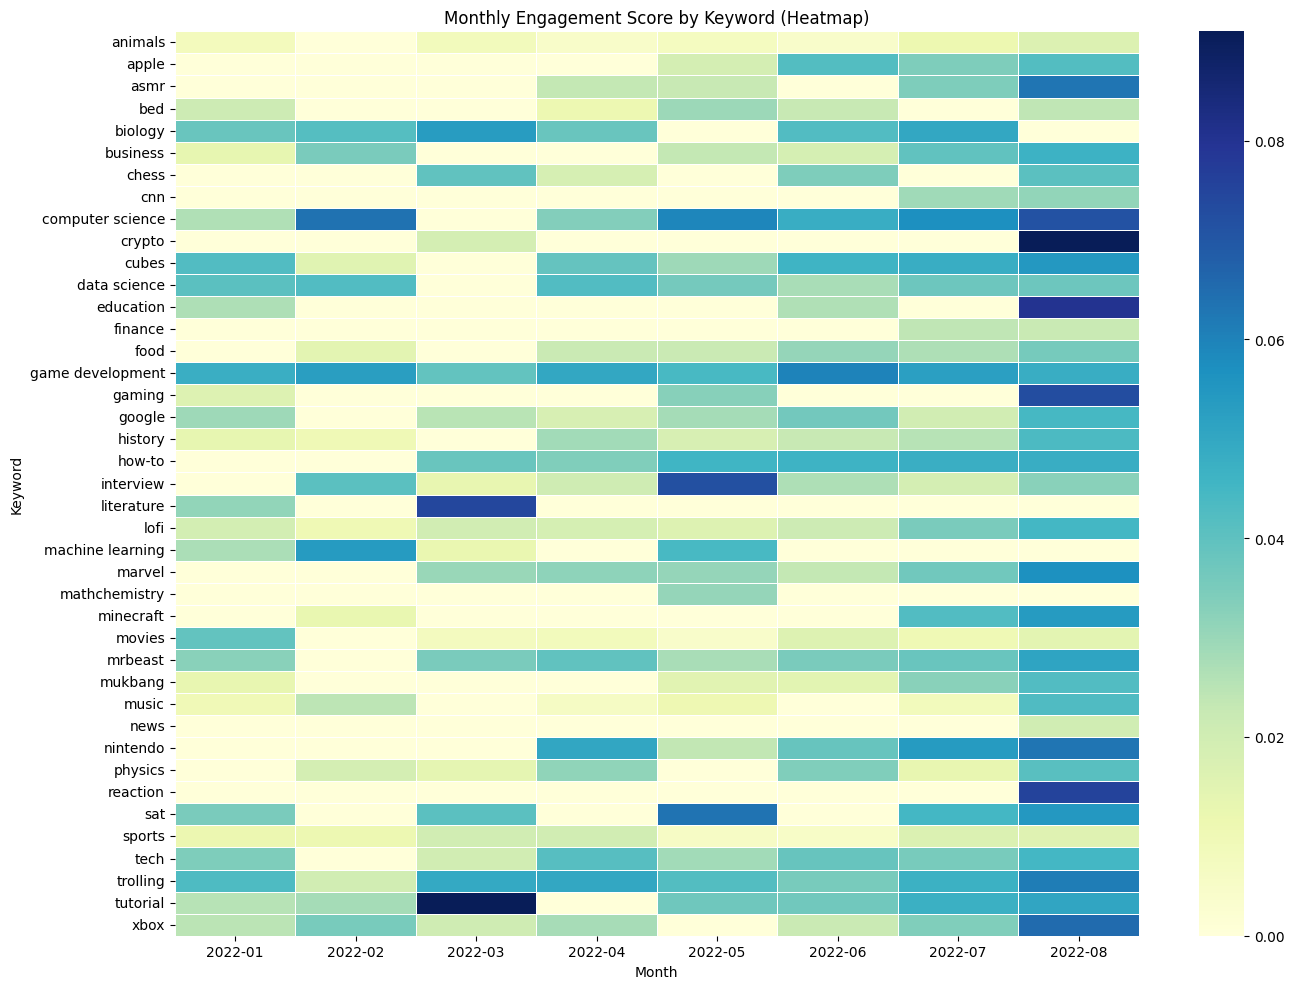

In [119]:
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_keyword_monthly_engagement.T, cmap='YlGnBu', linewidths=0.5)
plt.title('Monthly Engagement Score by Keyword (Heatmap)')
plt.xlabel('Month')
plt.ylabel('Keyword')
plt.tight_layout()
plt.show()

The heatmap visualizes the average Engagement Scorefor the various keywords across different months from Jan 20222 to Aug 2022. The color intensity (from light yellow for low engagement to blue for high engagement) allows for quick identification of trends and peaks in audience interaction.

Key Observations and Insights:
1. Crypto shows the strongest peak in Aug 2022, indicating exceptional audience interest.
2. Computer Science demonstrates consistently high engagement throughout the observation period.
3. Education exhibits spikes in specific months, suggesting seasonal or event driven engagement pattern.
4. Aug has a highest engagement for several keywords.
5. Topics likes tutorial, trolling, data science and tutorial demonstrate consistent moderate to high engagement throughout the time period.
6. Certain topics computer science, tech and business show sustained enagagment indicating a dedicATED AUDIENCE BASE.
7. Crypto's peak demonstrates audience responsiveness to external events.
8. Lower enagagement topics like literature and physics may represnt underserved area with some growth potential.
9. Some topics show steady performance while others exhibit viral-like spikes, suggesting different content strategies

Potential Implications and Recommendations:
1. Higher engagement periods correlate with increased monetization opportunities.
2. Consistent performance in tech-related topics suggests strong brand association with technology conten
3. Data-driven content planning can improve ROI on content creation efforts
4. Engagement patterns may indicate shifting audience preferences and interests
5. Underperforming topics with growth potential represent future expansion opportunities
6. Establishes baseline metrics for measuring future content performance
7. Increase content production for consistently high-performing topics (computer science, tech, gaming)
8. Align content calendar with identified seasonal patterns, particularly preparing for summer engagement peak
9. Focus on building dedicated communities around consistently engaging topics
10. Develop content formats that can span multiple topic categories
11. Gradually expand into underperforming topics that align with audience interests

#### Ques 7: How Views, Likes and Comments metrics interact with each other and can they predict engagement or content success.

In [120]:
video_stats.head()

,Title,Video ID,Published At,Keyword,Likes,Comments,Views,year,month,Engagement_Score
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,2022,8,0.030078
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779,4306,1758063,2022,8,0.046122
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825,3338,1564007,2022,8,0.042943
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566,1426,922918,2022,8,0.079088
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513,5155,1855644,2022,8,0.054789


In [121]:
video_stats_unique = video_stats.drop_duplicates(subset=['Video ID'], keep ='first')

In [122]:
video_stats_unique.head()

,Title,Video ID,Published At,Keyword,Likes,Comments,Views,year,month,Engagement_Score
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,2022,8,0.030078
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779,4306,1758063,2022,8,0.046122
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825,3338,1564007,2022,8,0.042943
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566,1426,922918,2022,8,0.079088
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513,5155,1855644,2022,8,0.054789


In [123]:
video_stats_unique

,Title,Video ID,Published At,Keyword,Likes,Comments,Views,year,month,Engagement_Score
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,2022,8,0.030078
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779,4306,1758063,2022,8,0.046122
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825,3338,1564007,2022,8,0.042943
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566,1426,922918,2022,8,0.079088
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513,5155,1855644,2022,8,0.054789
...,...,...,...,...,...,...,...,...,...,...
1874,Live Day 1- Introduction To Machine Learning A...,4UJelID_ICw,2022-02-01,machine learning,1861,184,37959,2022,2,0.053874
1875,Complete Roadmap for Machine Learning | ML Roa...,T4MLrtOKPjY,2021-05-11,machine learning,9615,648,319957,2021,5,0.032076
1876,Should You Learn Machine Learning?,AO6urf07KjE,2021-06-14,machine learning,10259,416,386360,2021,6,0.027630
1877,Todos podemos aprender Machine learning,7ClLKBUvmRk,2017-10-08,machine learning,2981,72,431421,2017,10,0.007077


In [124]:
video_stats_corr = video_stats_unique[['Views','Likes', 'Comments']].corr()
print(video_stats_corr)

             Views     Likes  Comments
Views     1.000000  0.756819  0.660800
Likes     0.756819  1.000000  0.891924
Comments  0.660800  0.891924  1.000000


Key Observations:
1. Views and Likes have a Correlation of 0.76.
This indicates there is a strong positive correlation between the number of views a content recives and the number of likes it gets.
This is an expected and logical relationship. As more people view content, there is a high probability that a larger number of them will engage by liking it. This suggests that increasing the content visibility (views) is a crucial prerequisite for generating likes.

2. Views and Comments have a Correlation of 0.66
This indicates there is moderately strong positive correlation between views and Comments.
Similar to likes, m,ore views generally lead to more conmments. However, the correlation is slightly weaker than views and likes. This could imply that while views are important for commnets, other factor such as content type i.e. keyword over here might play a relatively larger role in prompting users to leave a comment compared to simple like.

3. Likes and Commentshave a correlation of 0.89
there is a very strong positive correlation between the likes and comments.
This is the strongest relationship observed in the matrix. It suggests that content that resonates strongly enough recive likes is also highly likely to generate more discussions and comments.This could indicate: Content that recives many likes is generally seen as valuable, which encourages users to express their thoughts in comments. 


All the three engagement metrics are postitively correlated, indicating that they tend to move together. Content capable of generating likes is particularly effective at stimulating converstation.

Stategic Implications:
1. focus on Views
2. Optimize for Likes

In [125]:
#video_stats.to_csv('C:/Users/gailt/bhaktivscode/Youtube Content Analysis/engagement.csv', index=False)
#comments.to_csv('C:/Users/gailt/bhaktivscode/Youtube Content Analysis/comment_sentiment.csv', index=False)